# Car Sales Analysis

## Import Libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [24]:
df = pd.read_csv('Car_sales.csv')

In [79]:
dfcopy = df.copy()

## EDA

In [26]:
dfcopy.head(5)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Latest_Launch
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.28014952,2012-02-02
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.37077766,2011-06-03
2,Acura,CL,14.114,18.225,Passenger,28.4,3.2,225.0,106.9,70.6,192.0,3.47,17.2,26.0,1/4/2012,91.37077766,2012-01-04
3,Acura,RL,8.588,29.725,Passenger,42.0,3.5,210.0,114.6,71.4,196.6,3.85,18.0,22.0,3/10/2011,91.38977933,2011-03-10
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.7776392,2011-10-08


In [69]:
# show data in row 134
dfcopy.iloc[134]

Manufacturer                        Subaru
Model                              Outback
Sales_in_thousands                  47.107
__year_resale_value                  14.18
Vehicle_type                     Passenger
Price_in_thousands                  22.695
Engine_size                            2.5
Horsepower                           165.0
Wheelbase                            103.5
Width                                 67.5
Length                               185.8
Curb_weight                          3.415
Fuel_capacity                         16.9
Fuel_efficiency                       25.0
Latest_Launch          2011-07-07 00:00:00
Power_perf_factor                67.765908
Cluster                         27-33(mpg)
Cluster_Horsepower               50-175 HP
Name: 134, dtype: object

In [27]:
dfcopy.tail(5)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Latest_Launch
153,Volvo,S70,15.245,14.18,Passenger,27.5,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.65449545,2012-11-24
154,Volvo,V70,17.531,14.18,Passenger,28.8,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.1559776,2011-06-25
155,Volvo,C70,3.493,14.18,Passenger,45.5,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.6233572,2011-04-26
156,Volvo,S80,18.969,14.18,Passenger,36.0,2.9,201.0,109.9,72.1,189.8,3.6,21.1,24.0,11/14/2011,85.73565451,2011-11-14
157,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Latest_Launch


In [ ]:
dfcopy['Power_perf_factor'].min()


23.27627233

In [108]:
dfcopy['Power_perf_factor'].max()

188.144323

In [28]:
dfcopy.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor',
       'Latest_Launch '],
      dtype='object')

In [29]:
dfcopy.dtypes

Manufacturer           object
Model                  object
Sales_in_thousands     object
__year_resale_value    object
Vehicle_type           object
Price_in_thousands     object
Engine_size            object
Horsepower             object
Wheelbase              object
Width                  object
Length                 object
Curb_weight            object
Fuel_capacity          object
Fuel_efficiency        object
Latest_Launch          object
Power_perf_factor      object
Latest_Launch          object
dtype: object

In [85]:
#check for NaN values
dfcopy.isna().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
Latest_Launch          0
dtype: int64

## Data Type Transformation and Handle anappropriate values

In [81]:
# Convert columns to appropriate data types
columns_to_number=['Sales_in_thousands','__year_resale_value','Price_in_thousands','Wheelbase', 'Width', 'Length', 'Engine_size', 'Horsepower','Fuel_capacity','Fuel_efficiency','Curb_weight','Power_perf_factor']
for col in columns_to_number:
    dfcopy[col] = pd.to_numeric(dfcopy[col], errors='coerce')

In [32]:
# delete the 'Latest_Launch' column
dfcopy.drop('Latest_Launch ', axis=1, inplace=True)

In [83]:
# delete row with index 157
dfcopy.drop([157],inplace=True)

In [34]:
# Convert latest launch date to datetime format
dfcopy['Latest_Launch'] = pd.to_datetime(dfcopy['Latest_Launch'], format='%m/%d/%Y')
dfcopy['Latest_Launch'].head(5)

0   2012-02-02
1   2011-06-03
2   2012-01-04
3   2011-03-10
4   2011-10-08
Name: Latest_Launch, dtype: datetime64[ns]

In [51]:
dfcopy.head(5)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Cluster,Cluster_Horsepower
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.280150,27-33(mpg),50-175 HP
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-06-03,91.370778,27-33(mpg),270-450 HP
2,Acura,CL,14.114,18.225,Passenger,28.40,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2012-01-04,91.370778,27-33(mpg),270-450 HP
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2011-03-10,91.389779,22-26(mpg),270-450 HP
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2011-10-08,62.777639,27-33(mpg),50-175 HP


## Data Analysis

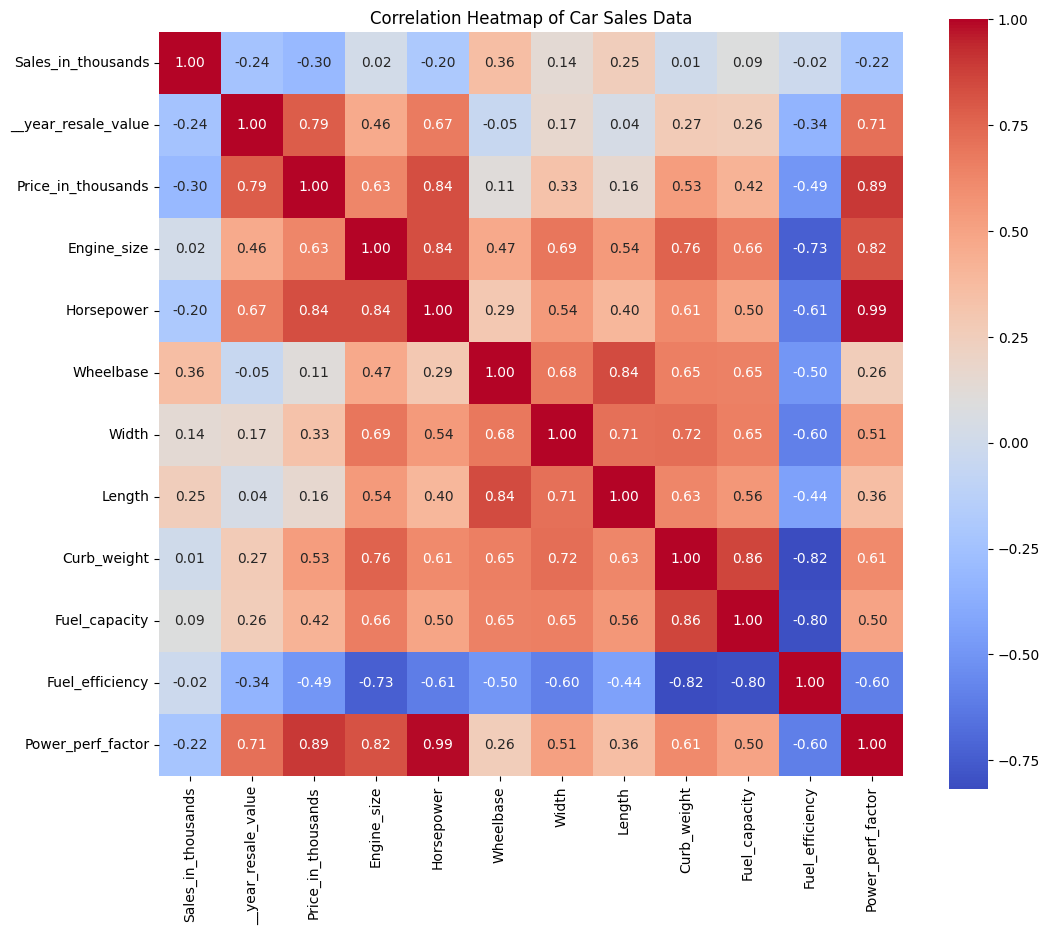

In [35]:
# Show correlation heatmap for every numeric column
dfcopy_numeric = dfcopy.select_dtypes(include=['number'])
dfcopy_numeric.head(5)
correlation = dfcopy_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Car Sales Data')
plt.show()

c:\Users\Irfan\.conda\envs\ds39\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Irfan\.conda\envs\ds39\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Irfan\.conda\envs\ds39\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Irfan\.conda\envs\ds39\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to 

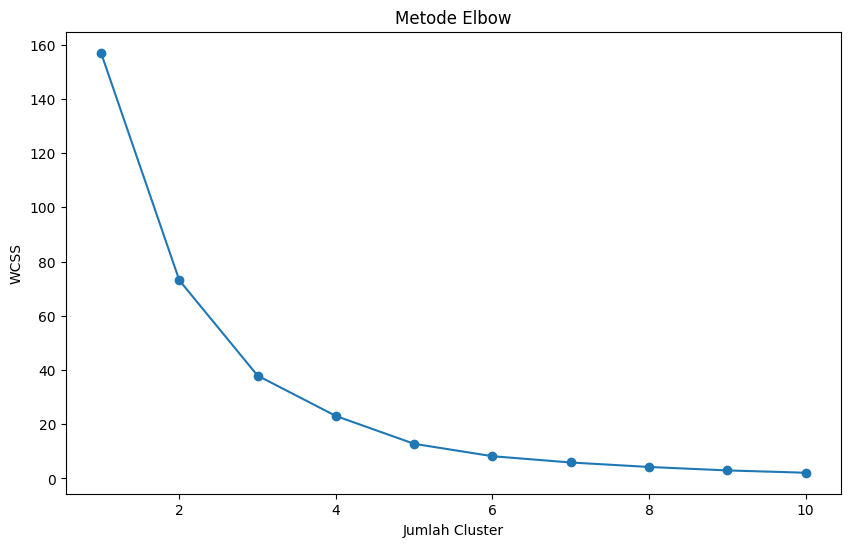

In [36]:
# Normalisasi data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dfcopy[['Fuel_efficiency']])

# Menentukan jumlah cluster menggunakan metode Elbow
wcss = []  # within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot untuk metode Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

c:\Users\Irfan\.conda\envs\ds39\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


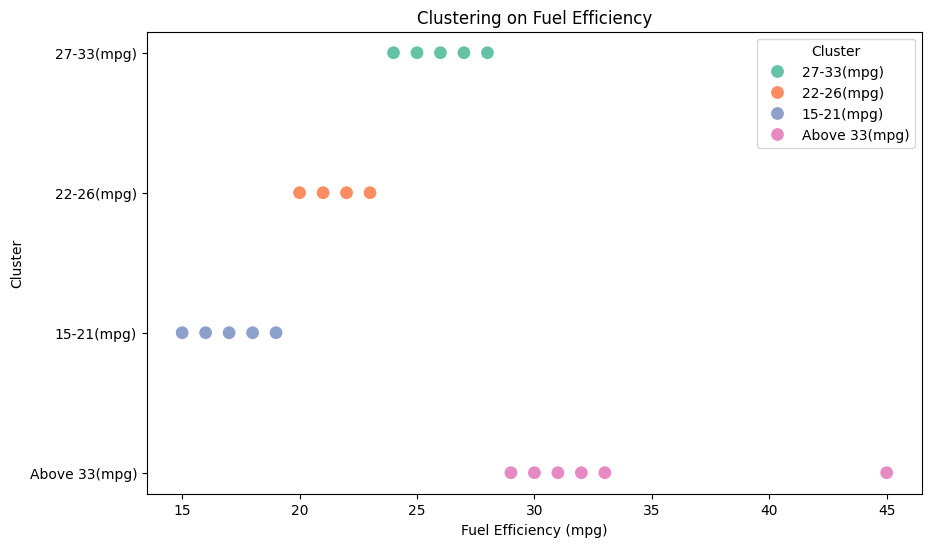

In [37]:
# Apply KMeans clustering with 4 clusters based on the elbow method
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
dfcopy['Cluster'] = kmeans.fit_predict(df_scaled)

dfcopy['Cluster'] = dfcopy['Cluster'].replace({0: '27-33(mpg)', 1: '15-21(mpg)', 2: 'Above 33(mpg)',3: '22-26(mpg)'})

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dfcopy, x='Fuel_efficiency', y='Cluster', hue='Cluster', palette='Set2', s=100)
plt.title('Clustering on Fuel Efficiency')
plt.xlabel('Fuel Efficiency (mpg)')
plt.ylabel('Cluster')
plt.show()


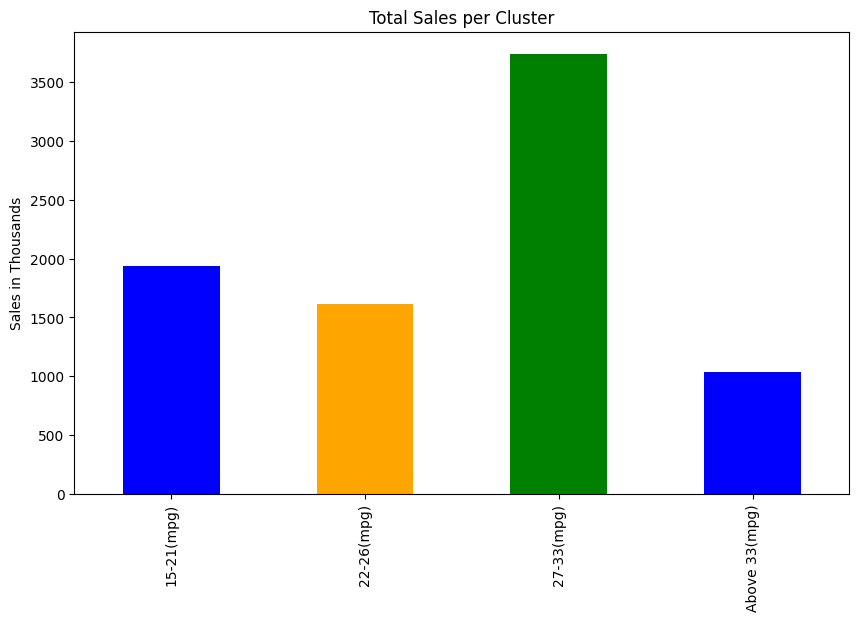

Total Sales per Cluster:
Cluster
15-21(mpg)       1933.887
22-26(mpg)       1612.479
27-33(mpg)       3743.047
Above 33(mpg)    1031.285
Name: Sales_in_thousands, dtype: float64


In [45]:
sales_per_cluster = dfcopy.groupby('Cluster')['Sales_in_thousands'].sum()

# Visualize total sales per cluster
plt.figure(figsize=(10, 6))
sales_per_cluster.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Total Sales per Cluster')
plt.xlabel('')
plt.ylabel('Sales in Thousands')
plt.show()

# Calcalate total sales per cluster
print("Total Sales per Cluster:")
print(sales_per_cluster)

In [39]:
# calculate min and max fuel efficiency for each cluster
cluster_stats = dfcopy.groupby('Cluster')['Fuel_efficiency'].agg(['min', 'max'])
# Display the cluster statistics
print("Cluster Statistics (Min and Max Fuel Efficiency):")
print(cluster_stats)

Cluster Statistics (Min and Max Fuel Efficiency):
                min   max
Cluster                  
15-21(mpg)     15.0  19.0
22-26(mpg)     20.0  23.0
27-33(mpg)     24.0  28.0
Above 33(mpg)  29.0  45.0


c:\Users\Irfan\.conda\envs\ds39\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Irfan\.conda\envs\ds39\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Irfan\.conda\envs\ds39\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Irfan\.conda\envs\ds39\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to 

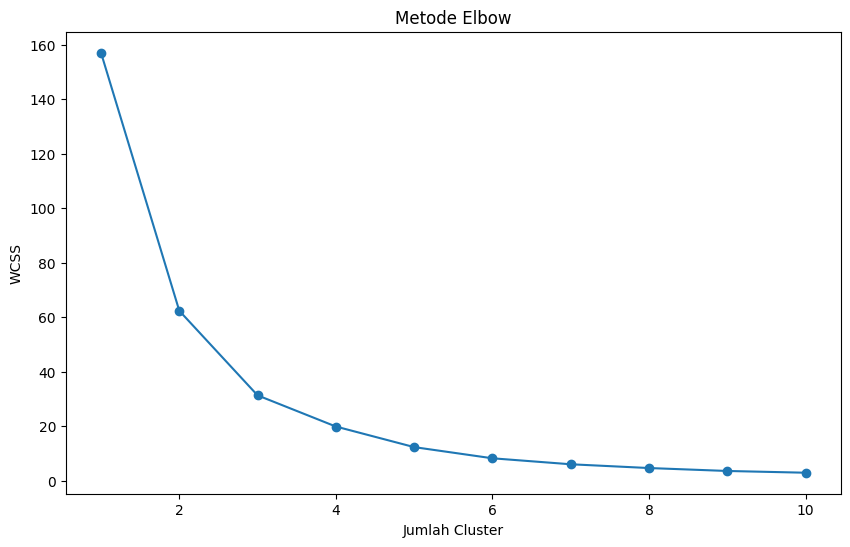

In [50]:
# Normalize 'Horsepower' column for clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dfcopy[['Horsepower']])

# Determine the number of clusters using the Elbow method
wcss = []  # within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Viusalize the Elbow method results for Horsepower
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

c:\Users\Irfan\.conda\envs\ds39\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


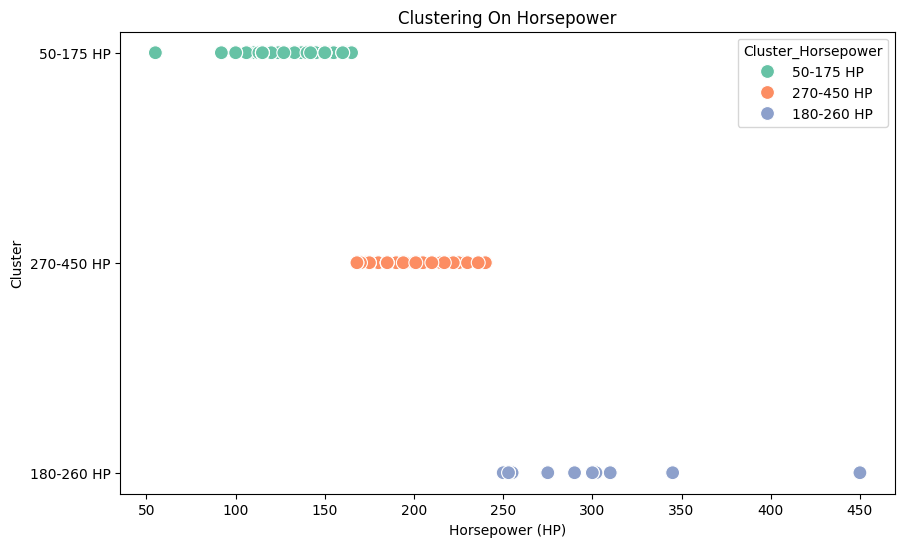

In [ ]:
# Apply KMeans clustering with 3 clusters based on the elbow method
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
dfcopy['Cluster_Horsepower'] = kmeans.fit_predict(df_scaled)


dfcopy['Cluster_Horsepower'] = dfcopy['Cluster_Horsepower'].replace({0: '50-175 HP', 1: '180-260 HP', 2: '270-450 HP'})

# Visualize the clusters based on Horsepower
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dfcopy, x='Horsepower', y='Cluster_Horsepower', hue='Cluster_Horsepower', palette='Set2', s=100)
plt.title('Clustering On Horsepower')
plt.xlabel('Horsepower (HP)')
plt.ylabel('Cluster')
plt.show()

Cluster_Horsepower
180-260 HP     306.053
270-450 HP    4159.530
50-175 HP     3855.115
Name: Sales_in_thousands, dtype: float64


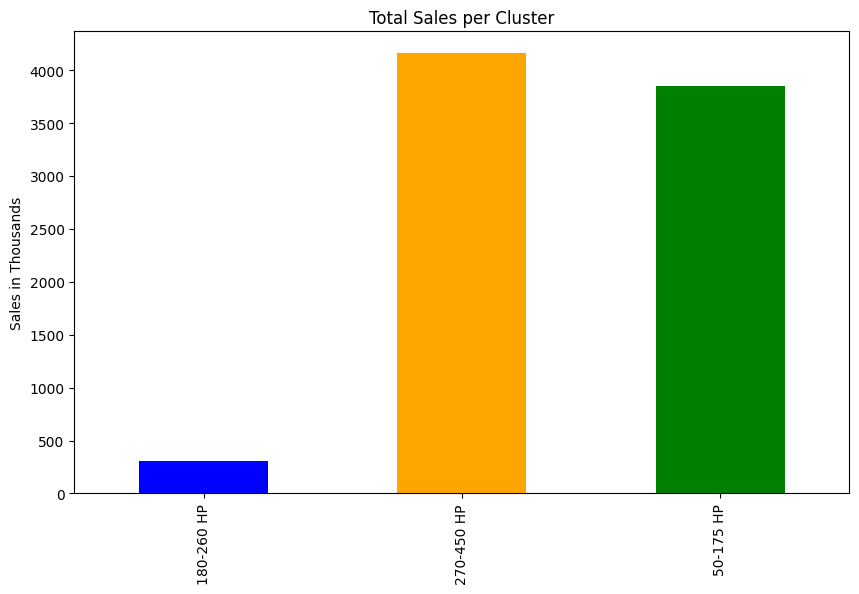

In [ ]:
# Compare total sales for each horsepower cluster
sales_per_cluster = dfcopy.groupby('Cluster_Horsepower')['Sales_in_thousands'].sum()
print(sales_per_cluster)

# Visualize total sales per horsepower cluster
plt.figure(figsize=(10, 6))
sales_per_cluster.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Total Sales per Cluster')
plt.xlabel('')
plt.ylabel('Sales in Thousands')
plt.show()

In [ ]:
# Display the min and max horsepower for each cluster
cluster_stats = df.groupby('Cluster_Horsepower')['Horsepower'].agg(['min', 'max'])

print(cluster_stats)

                      min    max
Cluster_Horsepower              
0                    55.0  175.0
1                   180.0  255.0
2                   275.0  450.0


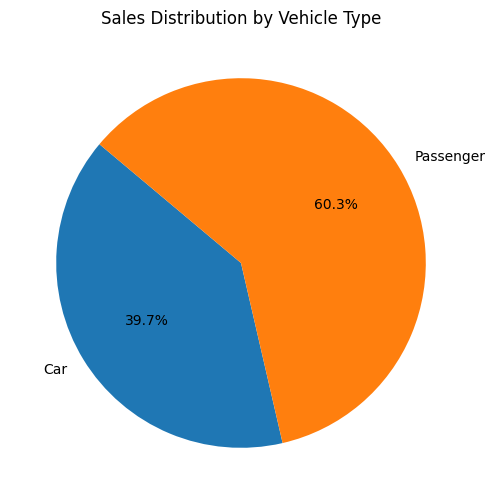

In [ ]:
# show visual pie chart highest sales for each vehicle type
plt.figure(figsize=(10, 6))
dfcopy.groupby('Vehicle_type')['Sales_in_thousands'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Vehicle Type')
plt.ylabel('')
plt.show()

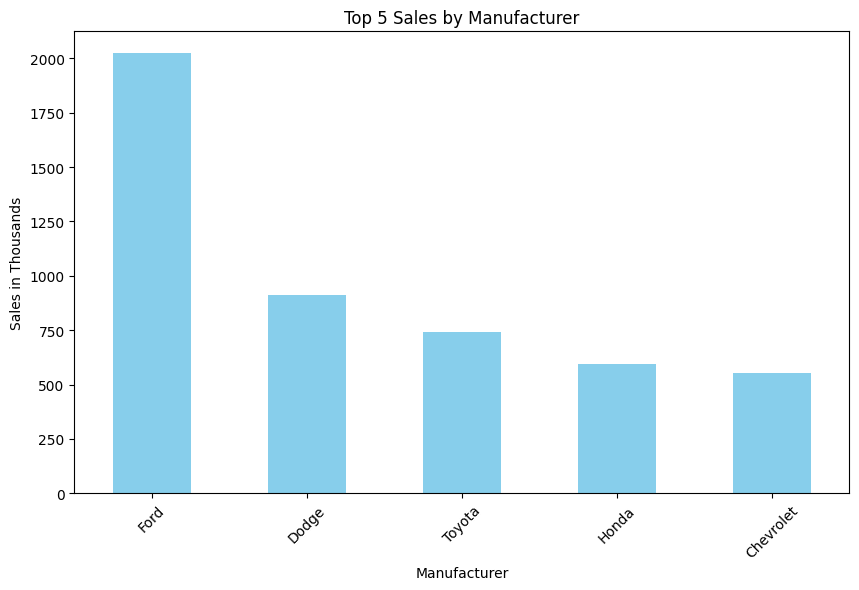

In [ ]:
# show  Top 5 Sales by Manufacturer
top_5_sales = dfcopy.groupby('Manufacturer')['Sales_in_thousands'].sum().nlargest(5)
plt.figure(figsize=(10, 6))
top_5_sales.plot(kind='bar', color='skyblue')
plt.title('Top 5 Sales by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Sales in Thousands')
plt.xticks(rotation=45)
plt.show()


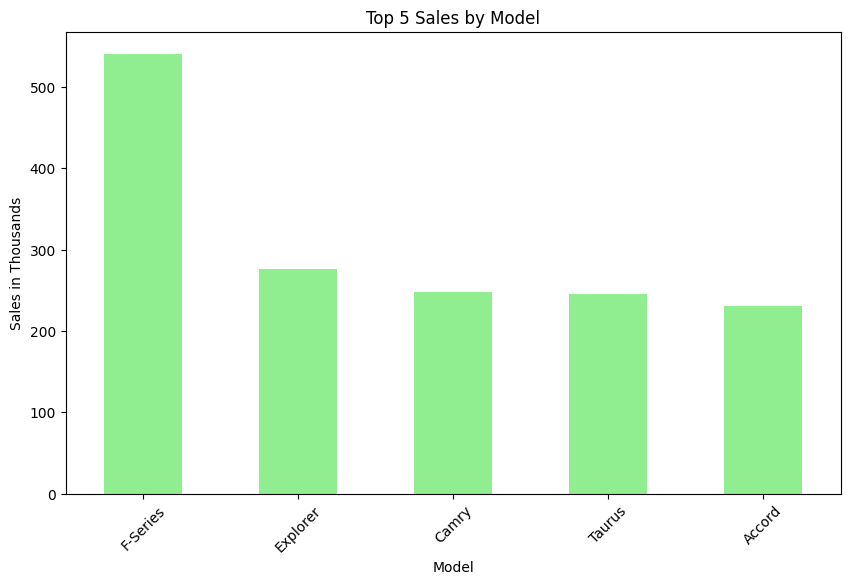

In [ ]:
# Show Top 5 Sales by Model
top_5_sales_model = dfcopy.groupby('Model')['Sales_in_thousands'].sum().nlargest(5)
plt.figure(figsize=(10, 6))
top_5_sales_model.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Sales by Model')
plt.xlabel('Model')
plt.ylabel('Sales in Thousands')
plt.xticks(rotation=45)
plt.show()

## Make a model for Predicting Car Price (Additional)

In [73]:
dfcopy.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor', 'Cluster',
       'Cluster_Horsepower'],
      dtype='object')

In [75]:
dfcopy.head(5)

,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,...,Manufacturer_Oldsmobile,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo
0,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,...,False,False,False,False,False,False,False,False,False,False
1,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,...,False,False,False,False,False,False,False,False,False,False
2,CL,14.114,18.225,Passenger,28.40,3.2,225.0,106.9,70.6,192.0,...,False,False,False,False,False,False,False,False,False,False
3,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,...,False,False,False,False,False,False,False,False,False,False
4,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# One-hot encode 'Manufacturer' first
df_encoded = pd.get_dummies(dfcopy, columns=['Manufacturer'], drop_first=True)

# Now select X and y
X = df_encoded[['Sales_in_thousands', '__year_resale_value', 'Engine_size', 'Horsepower',
                'Wheelbase', 'Width', 'Length', 'Fuel_capacity', 'Fuel_efficiency',
                'Curb_weight', 'Power_perf_factor'] +
               [col for col in df_encoded.columns if col.startswith('Manufacturer_')]]  # include one-hot columns

y = df_encoded['Price_in_thousands']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [87]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 8.981575418240646e-16
R-squared: 1.0


In [88]:
# Show coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Model Coefficients:")
print(coefficients)

Model Coefficients:
                          Coefficient
Sales_in_thousands       2.415731e-09
__year_resale_value     -1.614739e-08
Engine_size             -7.014724e-01
Horsepower              -5.188686e+01
Wheelbase               -4.080798e-09
Width                    2.161475e-09
Length                   1.522379e-09
Fuel_capacity            6.485049e-09
Fuel_efficiency         -4.671183e-09
Curb_weight             -1.188446e-08
Power_perf_factor        6.481192e+01
Manufacturer_Audi       -4.541104e-09
Manufacturer_BMW         1.371987e-09
Manufacturer_Buick      -3.013587e-09
Manufacturer_Cadillac    1.647041e-09
Manufacturer_Chevrolet  -5.475013e-09
Manufacturer_Chrysler   -1.331963e-08
Manufacturer_Dodge      -6.637312e-09
Manufacturer_Ford       -7.890489e-09
Manufacturer_Honda      -2.380201e-09
Manufacturer_Hyundai    -4.132703e-09
Manufacturer_Infiniti    2.687071e-11
Manufacturer_Jaguar      6.500523e-09
Manufacturer_Jeep       -4.456307e-09
Manufacturer_Lexus      -6.075

In [90]:
# Show the intercept of the model
intercept = model.intercept_
print(f'Intercept: {intercept}')

Intercept: 27.403229298493507


In [91]:
# Show the predicted prices for the test set
predicted_prices = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
print("Predicted Prices:")
print(predicted_prices.head(10))

Predicted Prices:
     Actual Price  Predicted Price
126        74.970           74.970
45         19.565           19.565
133        15.010           15.010
138        25.545           25.545
111        36.229           36.229
29         24.495           24.495
95         82.600           82.600
97         41.000           41.000
94         69.700           69.700
139        16.875           16.875


In [93]:
dfcopy.iloc[29]

Manufacturer                Chrysler
Model                  Sebring Conv.
Sales_in_thousands            32.775
__year_resale_value            14.18
Vehicle_type               Passenger
Price_in_thousands            24.495
Engine_size                      2.5
Horsepower                     168.0
Wheelbase                      106.0
Width                           69.2
Length                         193.0
Curb_weight                    3.332
Fuel_capacity                   16.0
Fuel_efficiency                 24.0
Latest_Launch             11/17/2011
Power_perf_factor          69.521355
Latest_Launch             2011-11-17
Name: 29, dtype: object

In [94]:
# Save the model for future use
import joblib
joblib.dump(model, 'car_price_prediction_model.pkl')

['car_price_prediction_model.pkl']

In [127]:
# Load the model and make predictions
loaded_model = joblib.load('car_price_prediction_model.pkl')

# Input values for prediction
input_values = {
    'Manufacturer': 'Xtera',
    'Sales_in_thousands': 40,
    '__year_resale_value': 67,
    'Engine_size': 2.0,
    'Horsepower': 150,
    'Wheelbase': 110,
    'Width': 70,
    'Length': 180,
    'Fuel_capacity': 15,
    'Fuel_efficiency': 15,
    'Curb_weight': 3.0,
    'Power_perf_factor': 188
}
# Convert input values to DataFrame
input_df = pd.DataFrame([input_values])
# One-hot encode the input values
input_df_encoded = pd.get_dummies(input_df, columns=['Manufacturer'], drop_first=True)
# Ensure the input DataFrame has the same columns as the training data
missing_cols = set(X.columns) - set(input_df_encoded.columns)
for col in missing_cols:
    input_df_encoded[col] = 0
input_df_encoded = input_df_encoded[X.columns]  # Reorder columns to match training data
# Scale the input values
input_scaled = scaler.transform(input_df_encoded)
# Make prediction
predicted_price = loaded_model.predict(input_scaled)
print(f'Predicted Price for the input values: {predicted_price[0]} thousands')

Predicted Price for the input values: 348.47079515591787 thousands


In [ ]:
# Min and Max value for every column
min_max_values = dfcopy.agg(['min', 'max']).T
print("Min and Max Values for Each Column:")
print(min_max_values)

Min and Max Values for Each Column:
                            min         max
Manufacturer              Acura       Volvo
Model                     3-Sep      Xterra
Sales_in_thousands         0.11     540.561
__year_resale_value        5.16       67.55
Vehicle_type                Car   Passenger
Price_in_thousands        9.235        85.5
Engine_size                 1.0         8.0
Horsepower                 55.0       450.0
Wheelbase                  92.6       138.7
Width                      62.6        79.9
Length                    149.4       224.5
Curb_weight               1.895       5.572
Fuel_capacity              10.3        32.0
Fuel_efficiency            15.0        45.0
Latest_Launch         1/14/2012    9/3/2011
Power_perf_factor     23.276272  188.144323
Latest_Launch        2008-02-13  2012-12-29
